In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



*   Elemento de lista
*   Elemento de lista



# Método de Runge-Kutta de orden 4

El método de RK4 es una extensión de RK2, en este ahora expandimos en serie de Taylor hasta considerar los términos de $h^3$ y $h^4$, de esta manera se obtienen soluciones más precisas:

$$
k_1=hf(x,t)
$$

$$
k_2=hf(x+k_1 /2,t+h/2)
$$

$$
k_3=hf(x+k_2/2,t+h/2)
$$

$$
k_4=hf(x+k_3,t+h)
$$

$$
x(t+h)=x(t)+\frac{(k_1+2k_2+2k_3+k_4)}{6}
$$

Noten que ahora el error está dado por la acumulación de errores $h^5$ en cada iteración.

# Ecuaciones Diferenciales con más de una variable

Digamos que tenemos un sistema de ecuaciones diferenciales simultaneas donde la derivada de cada variable puede depender del resto. Un ejemplo es:

$$
\frac{dx}{dt}= xy-x, \frac{dy}{dt}=y-xy+sin^2(wt)
$$

Donde $t$ sigue siendo la única variable independiente. Noten que son ecuaciones diferenciales ordinarias, no son ecuaciones diferenciales parciales!!

Podemos expresar el sistema de forma más general como:

$$
\frac{dx}{dt}= f_x(x,y,t), \frac{dy}{dt}=f_y(x,y,t)
$$

Para un número arbitrario de variables estas ecuaciones se pueden generalizar usando notación vectorial.

$$
\frac{d\mathbf{r}}{dt} = \mathbf{f}(\mathbf{r},t)
$$

Donde $\mathbf{r} = (x,y,\ldots)$ y $\mathbf{f} = (f_x(\mathbf{r},t), f_y(\mathbf{r},t), \ldots)$

Podemos obtener de el método de Euler para varias variables de la siguiente forma (expandimos en serie de Taylor):

$$
\mathbf{r}(t+h)=\mathbf{r}(t)+h\frac{d\mathbf{r}}{dt}+O(h^2)\\
       =\mathbf{r}(t)+h\mathbf{f}(x,t)+O(h^{2})
$$

Ignorando términos de orden cuadrático obtenemos por fín el método de Euler multivariable:

$$
\mathbf{r}(t+h)=\mathbf{r}(t)+h\mathbf{f}(x,t)
$$

Y de la misma manera se puede generalizar Runge-Kutta:

$$
\mathbf{k_1}=h\mathbf{f}(\mathbf{r},t)
$$

$$
\mathbf{k_2}=h\mathbf{f}(\mathbf{r}+0.5\mathbf{k_1},t+0.5h)
$$

$$
\mathbf{k_3}=h\mathbf{f}(\mathbf{r+}0.5\mathbf{k_2},t+0.5h)
$$

$$
\mathbf{k_4}=h\mathbf{f}(\mathbf{r}+\mathbf{k_3},t+h)
$$

$$
\mathbf{r(t+h)}=\mathbf{r}(t)+\frac{(\mathbf{k_1+2k_2+2k_3+k_4)}}{6.}
$$

# Método leapfrog

Considerando la expresión general para la ecuación diferencial de primer orden de una sóla variable:

$$
\frac{dx}{dt} = f(x,t)
$$

Expresamos a Runge-Kutta de segundo órden de la siguiente manera:

$$
x(t+\frac{1}{2}h) = x(t) + \frac{1}{2}hf(x,t)\\
x(t+h)=x(t)+hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)
$$

Pero ahora en vez de calcular el punto medio de $x(t+h)$ lo calculamos del previo punto medio $x(t+\frac{1}{2}h)$, en términos matemáticos:

$$
x(t+\frac{3}{2}h) = x(t+\frac{1}{2}h) + hf(x(t+h),t+h)\\
$$
Leapfrog es una variante de esta idea calculamos los valores con índice semi entero del valor previo.

$$
x(t+2h) = x(t+h) + hf(x(t+\frac{3}{2}h),t+\frac{3}{2}h)\\
$$

De esta manera podemos obtener las expresiones sobre las cuales podemos iterar.

$$
x(t+h) = x(t) + hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)\\
x(t+\frac{3}{2}h) = x(t+\frac{1}{2}h) + hf(x(t+h),t+h)\\
$$

Podemos generalizar a ecuaciones diferenciales simultaneas pasando de $x$ a  $\mathbf{r}$ y de una función $f$ a la función vectorial $\mathbf{f}$

$$
\mathbf{r}(t+h) = \mathbf{r}(t) + h\mathbf{f}(\mathbf{r}(t+\frac{1}{2}h),t+\frac{1}{2}h)\\
\mathbf{r}(t+\frac{3}{2}h) = \mathbf{r}(t+\frac{1}{2}h) + h\mathbf{f}(\mathbf{r}(t+h),t+h)\\
$$

Si bien Runge-Kutta de cuarto órden es mejor y no implica demasiado esfuerzo implementarlo, leap frog tiene propiedades interesantes. Por ejemplo es simétrico con respecto a inversión temporal. $\Longrightarrow$ Para sistemas físicos, conserva energía....!!!!

Para ver esto hacemos pasos para atrás en el tiempo desde un punto adelante. Es decir usamos $-h$ a un tiempo $t+\frac{3}{2}h$.

Usando primero $-h$
$$
x(t-h) = x(t) - hf(x(t-\frac{1}{2}h),t-\frac{1}{2}h)\\
x(t-\frac{3}{2}h) = x(t-\frac{1}{2}h) + hf(x(t-h),t-h)\\
$$

Ahora evualuando en $t+\frac{3}{2}h$.

$$
x(t+\frac{1}{2}h) = x(t+\frac{3}{2}h) - hf(x(t+h),t+h)\\
x(t) = x(t+h) - hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)\\
$$



## Ej 1: Ecuación de Kepler

$$
    dt= \sqrt{\frac{\mu}{2}} \frac{dr}{\sqrt{k/r - \ell^2/(2\mu r^2)-E}} =  \sqrt{\frac{\mu a^3}{k}} (1-e\cos\psi)d\psi,
$$

entonces

$$
\frac{d\psi}{dt} = \frac{1}{\sqrt{\frac{\mu a^3}{k}} (1-e\cos\psi)}
$$

In [ ]:
def ec(psi, mu, a, e, k):

    R = np.sqrt((mu*a**3)/k)
    P = 1-e*np.cos(psi)

    return 1/(R*P)

In [ ]:
def x(psi,a):

    return a*np.cos(psi)

def y(psi,b):

    return b*np.sin(psi)

In [ ]:
def E(e, I, mu, w, k):

    return (e**2 - 1)*(mu*k**2)/(2*(I**2)*(w**2))

Resolvamos este problema para el caso particular de Marte

In [ ]:
# Parámetros Marte

a = 1.524           #(UA)
b = 1.517           #(UA)
e = 0.093

m_marte = 0.107       # M⊕
m_sol = 332946        # M⊕

mu = (m_marte* m_sol)/(m_marte + m_sol)

Necesitamos convertir convertir la constante $G$ a las unidades que estamos usando, es decir, años en lugar de segundos, UA en lugar de metros y masas terrestres en lugar de kilogramos.

$$
G = 6.672 \times 10^{-11} \frac{m^3}{kg\,s^2}\left(\frac{6.6846\times 10^{-12}\,UA}{1m}\right)^3\,\left(\frac{1kg}{1.6744 \times 10^{-25} M_⊕}\right)\left(\frac{1s}{3.17098\times 10^{-8} año} \right)^2 = 1.183684854\times 10^{-4} \frac{{UA}^3}{M_⊕\,año^2}
$$

In [ ]:
G = 1.183684854e-4
k = G * m_sol * m_marte

In [ ]:
# Método de Euler

dt = 0.05 #(años)

t = [0]
psi = [0]

j = 1

while psi[-1] <= 2*np.pi:

    psi_j = psi[j-1] + ec(psi[j-1], mu, a, e, k)*dt
    t_j = t[j-1] + dt

    psi.append(psi_j)
    t.append(t_j)

    j += 1

X = x(psi, a)
Y = y(psi, b)

In [ ]:
df = pd.DataFrame({'t':t,'psi(t)': psi, 'x(t)': X, 'y(t)': Y})
df.head(10)

,t,psi(t),x(t),y(t)
0,0.00,0.000000,1.524000,0.000000
1,0.05,0.183946,1.498289,0.277475
2,0.10,0.367574,1.422200,0.545138
3,0.15,0.550269,1.299033,0.793264
4,0.20,0.731472,1.134148,1.013304
5,0.25,0.910717,0.934486,1.198344
6,0.30,1.087645,0.708008,1.343357
7,0.35,1.262018,0.463136,1.445254
8,0.40,1.433709,0.208267,1.502768
9,0.45,1.602696,-0.048607,1.516228


Text(0.5, 1.0, 'Gráfica $t$ vs $\\psi$ Marte')

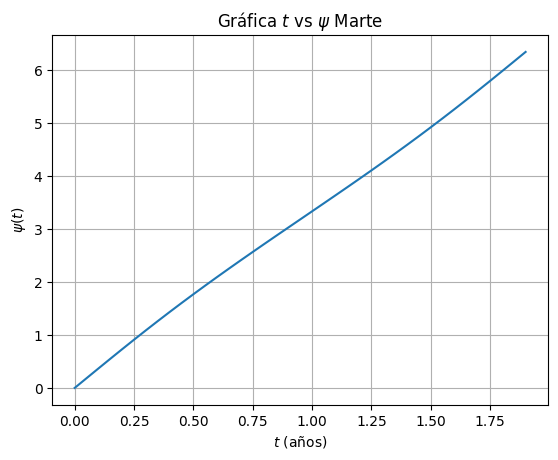

In [ ]:
plt.plot(t,psi)


plt.grid()
plt.xlabel("$t$ (años)")
plt.ylabel("$\psi(t)$")
plt.title("Gráfica $t$ vs $\psi$ Marte")


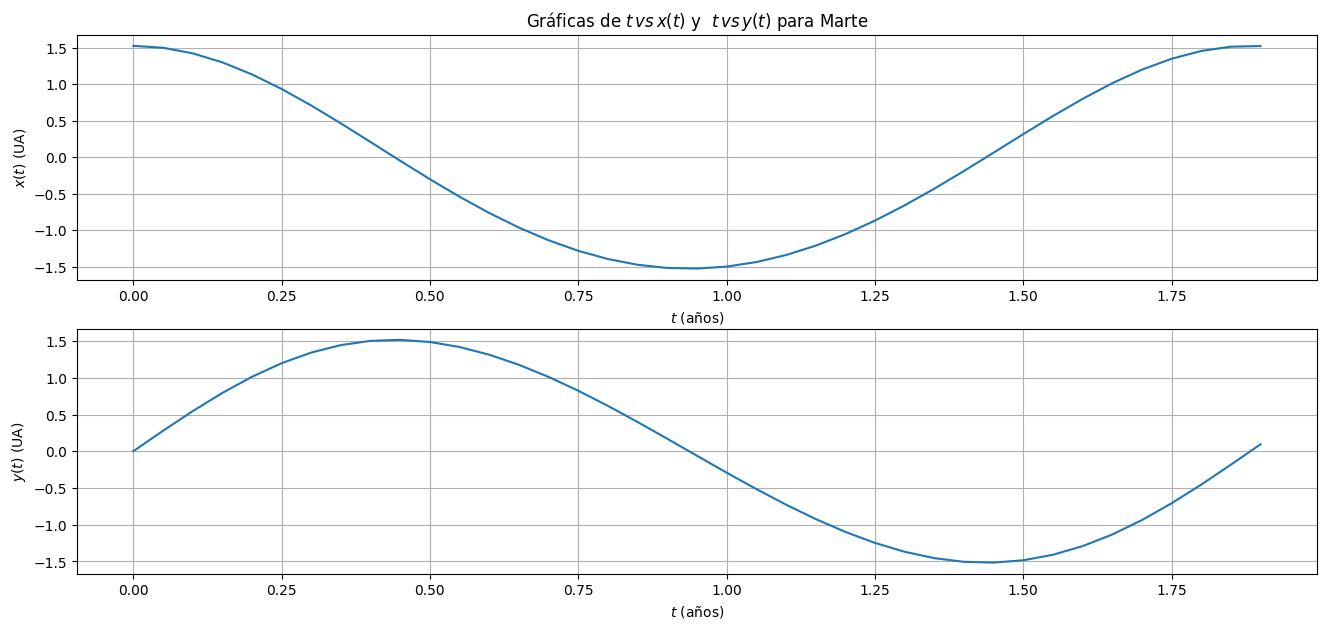

In [ ]:
fig, axs = plt.subplots(2, figsize=(16,7))

axs[0].plot(t, X)
axs[0].set_xlabel("$t$ (años)")
axs[0].set_ylabel("$x(t)$ (UA)")
axs[0].set_title("Gráficas de $t\,vs\,x(t)$ y  $t\,vs\,y(t)$ para Marte")
axs[0].grid()


axs[1].plot(t, Y)
axs[1].set_xlabel("$t$ (años)")
axs[1].set_ylabel("$y(t)$ (UA)")
axs[1].grid()


In [ ]:
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()
fig, ax = plt.subplots()

def animate(i):

    plt.cla()
    plt.grid(alpha = 0.3)
    plt.plot(X,Y, '--', alpha = 0.5)
    plt.plot(X[i],Y[i] , 'ro')

    plt.xlabel("$x(t)$ (UA)")
    plt.ylabel("$y(t)$ (UA)")
    plt.title("Gráfica de la trayectoria de Marte: t = {:.3f} años".format(t[i]))

    plt.xlim(np.min(X)-0.5, np.max(X)+0.5)
    plt.ylim(np.min(Y)-0.5, np.max(Y)+0.5)

matplotlib.animation.FuncAnimation(fig, animate, frames=38)

## Ej 2: Ecuaciones de Lorentz

De las ecuaciones diferenciales más conocidas:

$$
\frac{dx}{dt}=\sigma(y-x), \frac{dy}{dt}=rx-y-xz, \frac{dz}{dt}=xy-bz
$$

Donde $\sigma, r$ y $b$ son constantes.

Estudiadas por Edward Lorenz en 1963, para estudiar patrones de clima simplificados. Son famosas por ser de los primeros ejemplos de caos determinista, apariencia de movimiento aleatorio a pesar de que no hay aleatoridad en las ecuaciones.

a) Escribe un programa para resolver las ecuaciones de Lorenz para el caso $\sigma=10, r=28$ y $b=\frac{8}{3}$ donde t va de 0 a 50 con las condiciones iniciales $(x,y,z) = (0,1,0)$. Haz que el programa grafique $y$ como función del tiempo.

b) Modifica tu programa para producir una gráfica de $z$ vs $x$. Deberías de ver el famoso atractor extraño  de las ecuaciones de Lorenz.

In [ ]:
sigma = 10
rr = 35
bb = 8/3.

def f(r,t):

    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma*(y-x)
    fy = rr*x-y-x*z
    fz = x*y-bb*z

    return np.array([fx,fy,fz],float)

a,b = 0.0,100.0
N = 10000
h = (b-a)/N

lista_t = np.arange(a,b,h)
lista_x,lista_y,lista_z=[],[],[]

r = np.array([0,1.0,0.0],float) #condiciones iniciales

for t in lista_t:

    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)

    r+=(k1+2*k2+2*k3+k4)/float(6)

    lista_x.append(r[0])
    lista_y.append(r[1])
    lista_z.append(r[2])

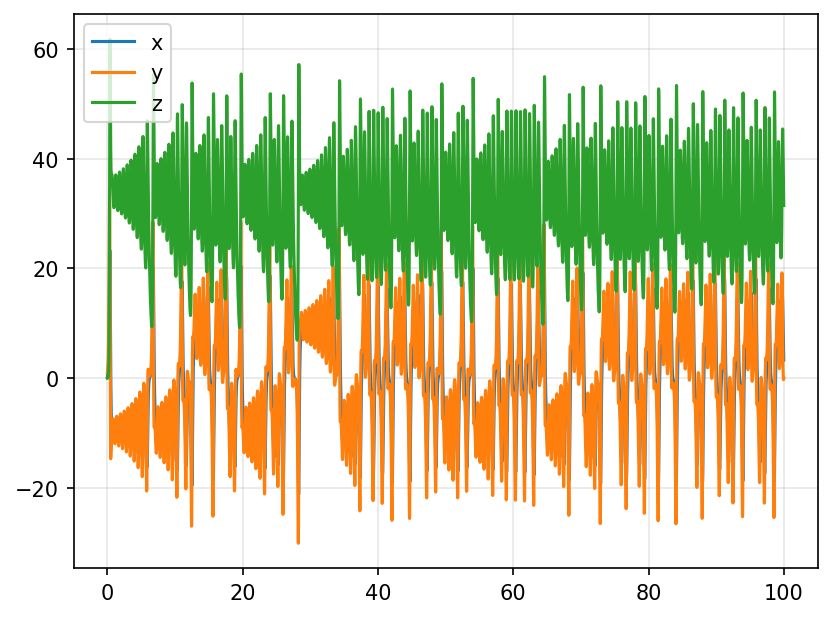

In [ ]:
plt.plot(lista_t,lista_x, label = 'x')
plt.plot(lista_t,lista_y, label = 'y')
plt.plot(lista_t,lista_z, label = 'z')

plt.legend()
plt.grid(alpha = 0.3)
plt.show()

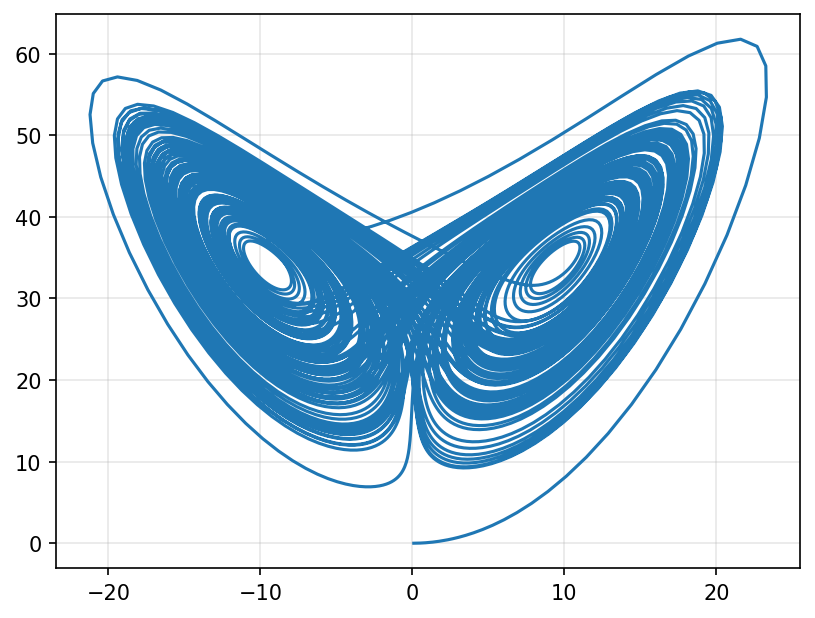

In [ ]:
plt.plot(lista_x,lista_z) #espacio fase
plt.grid(alpha = 0.3)
plt.show()

# Ecuaciones Diferenciales de segundo orden

Consideremos el caso más simple, donde sólo dependemos de la variable x. La forma general de la ecuación es:
$$\frac{dx^2}{dt^2}=f(x,\frac{dx}{dt},t)$$
donde $f$ es una función arbitraria.
El truco es plantear otra variable $y=\frac{dx}{dt}$, tal que el sistema se reduzca a un sistema de dos ecuaciones lineales acopladas:
$$
x=\frac{dy}{dt}\\
y=\frac{dx}{dt}
$$

## Ej 3: Péndulo no lineal
El desplazamiento del brazo en la posición vertical está dado en términos de $\theta$ y su dirección tangencial es $l\frac{d^2\theta}{dt^2}$.

$$
ml\frac{d^2\theta}{dt^2} = -mg sin(\theta)
$$

$$
\frac{d^2\theta}{dt^2} = -\frac{g}{l} sin(\theta)
$$

Expresando la ecuación de segundo órden como dos ecuaciones diferenciales de primer órden.

$$
\frac{d\theta}{dt} = \omega
$$

$$
\frac{d\omega}{dt} = -\frac{g}{l}sin\theta
$$


In [ ]:
g=9.81
l=0.1

def f(r,t):
    theta = r[0]
    omega = r[1]

    ftheta = omega
    fomega = (-g/l)*np.sin(theta)

    return np.array([ftheta,fomega],float)

In [ ]:
#Leap-Frog
a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

lista_t = np.arange(a,b,h)
lista_theta = []

r = np.array([179/180*np.pi,0],float)
rH = r+0.5*h*f(r,0)

for t in lista_t:

    lista_theta.append(r[0])
    r+=h*f(rH,t+0.5*h)
    rH+=h*f(r,t+h)

plt.plot(lista_t,lista_theta)
plt.xlabel('t')
plt.ylabel('$\Theta$(t)')
plt.grid(alpha = 0.3)

plt.show()

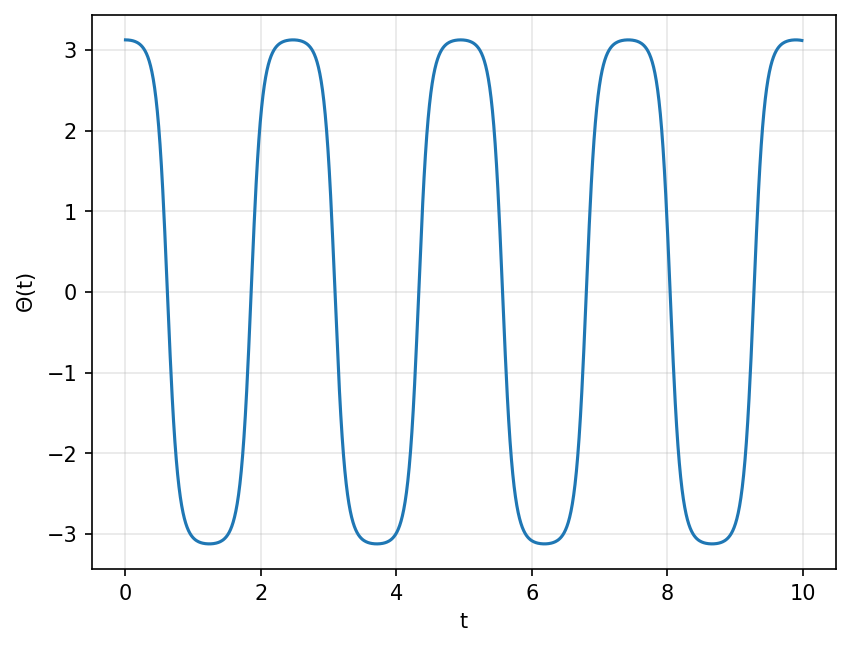

In [ ]:
plt.plot(lista_t,lista_theta)
plt.xlabel('t')
plt.ylabel('$\Theta$(t)')
plt.grid(alpha = 0.3)

plt.show()

# Método de Verlet

Supongamos que utilizamos el método de leapfrog para resolver ecuaciones de movimiento para sistemas físicos clásicos. Estas ecuaciones, derivadas de la segunda ley de Newton, toman la forma de ecuaciones diferenciales de segundo orden:

$$
\frac{d^2x}{dt^2} = f(x,t)
$$

Como ya sabemos, esto se puede reescribir como dos ecuaciones acopladas de primer orden:

$$
\frac{dx}{dt} = v \quad \frac{dv}{dt} = f(x,t)
$$


Si quisieramos aplicar el método de Leapfrog a estas ecuaciones, la estrategia más simple sería resolver las ecuaciones en una sola ecuación vectorial con $\mathbf{r} = (x,v) $, es decir:

$$
\frac{d \mathbf{r}}{dt} = \mathbf{f}(\mathbf{r},t)
$$

Así, escribamos de forma analítica cómo aplicar el método de Leapfrog. Si conocemos el valor de $x$ a un cierto tiempo $t$ y el valor de $v$ al tiempo $t + \frac{1}{2}h$, entonces, aplicando el método, el valor de $x$ un tiempo $h$ después de $t$ es:

$$
x(t + h) = x(t) + hv(t + \frac{1}{2}h)
$$

y para $v$ tenemos

$$
v(t + \frac{3}{2} h) = v(t + \frac{1}{2} h) + hf(x(t+h), t+h)
$$

Con esto, podemos derivar una solución al problema utilizando estas ecuaciones de forma repetida tantas veces como querramos. Esta simplificación del problema funciona sólamente para ecuaciones diferenciales de segundo orden que tienen una estructura en especial, dónde el lado derecho de la primera ecuación acoplada depende únicamente $v$, pero no de $x$ y el lado derecho de la segunda ecuación acoplada depende únicamente de $x$, pero no de $v$.

Así, vemos que hay un pequeño problema con esta solución, ya que es impracticable si queremos calcular alguna cantidad física que dependa de $x$ y de $v$ al mismo tiempo.

Sin embargo, existe una solución para este dilema. Resulta que podemos calcular la velocidad en puntos enteros haciendo un medio paso adicional de la siguiente forma. Si conocemos $v(t+h)$, entonces podemos calcular $v(t + \frac{1}{2} h$) haciendo medio paso hacia atrás en el método de Euler. Esto es, emplear Euler de la siguiente forma:

$$
v(t + \frac{1}{2}h) = v(t+h) - \frac{1}{2}h f(x(t+h), t+h)
$$

de aquí podemos despejar

$$
v(t+h) = v(t + \frac{1}{2}h) + \frac{1}{2}h f(x(t+h), t+h)
$$

combiando esto con las ecuaciones que teníamos antes para $x(t + h)$ y $v(t + \frac{3}{2} h)$ conseguimos:

$$
x(t + h) = x(t) + hv(t + \frac{1}{2}h)
$$
$$
k = hf(x(t+h), t+h)
$$
$$
v(t+h) = v(t + \frac{1}{2}h) + \frac{1}{2}k
$$
$$
v(t + \frac{3}{2} h) = v(t + \frac{1}{2} h) + k
$$

a esta variante de Leapfrog se le conoce como Método de Verlet.